In [145]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas
import os
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
import holoviews as hv
%matplotlib inline

In [146]:
#setting csv file path for the SBA_PPP file
csvpath = Path("SBA.csv") 

In [147]:
# Use the file path to read the CSV into a DataFrame
SBA_PPP_df = pd.read_csv(csvpath)

In [148]:
SBA_PPP_df.head()

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149990.0,STATEN ISLAND,NY,10309.0,238340.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,8.0,05/01/2020,"JPMorgan Chase Bank, National Association",NY - 11
1,149990.0,WHITESTONE,NY,11357.0,621210.0,Corporation,Unanswered,Male Owned,Non-Veteran,NaN,16.0,04/29/2020,"JPMorgan Chase Bank, National Association",NY - 03
2,149987.0,BROOKLYN,NY,11205.0,484110.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,13.0,04/28/2020,East West Bank,NY - 07
3,149982.0,ISLIP TERRACE,NY,11752.0,236115.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,8.0,05/01/2020,"JPMorgan Chase Bank, National Association",NY - 02
4,149979.0,NEW YORK,NY,10005.0,541840.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,11.0,05/01/2020,Haddon Savings Bank,NY - 10


In [32]:
SBA_PPP_df.dtypes

LoanAmount       float64
City              object
State             object
Zip              float64
NAICSCode        float64
BusinessType      object
RaceEthnicity     object
Gender            object
Veteran           object
NonProfit         object
JobsRetained     float64
DateApproved      object
Lender            object
CD                object
dtype: object

In [33]:
#renaming columns in the df
SBA_PPP_df = SBA_PPP_df.rename(columns= {"LoanAmount": "Loan Amount", "NAICSCode": "NAICS Code", "DateApproved": "Date Approved", "JobsRetained": "Jobs Retained"})

In [34]:
SBA_PPP_df.head()

,Loan Amount,City,State,Zip,NAICS Code,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,Jobs Retained,Date Approved,Lender,CD
0,149990.0,STATEN ISLAND,NY,10309.0,238340.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,8.0,05/01/2020,"JPMorgan Chase Bank, National Association",NY - 11
1,149990.0,WHITESTONE,NY,11357.0,621210.0,Corporation,Unanswered,Male Owned,Non-Veteran,NaN,16.0,04/29/2020,"JPMorgan Chase Bank, National Association",NY - 03
2,149987.0,BROOKLYN,NY,11205.0,484110.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,13.0,04/28/2020,East West Bank,NY - 07
3,149982.0,ISLIP TERRACE,NY,11752.0,236115.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,8.0,05/01/2020,"JPMorgan Chase Bank, National Association",NY - 02
4,149979.0,NEW YORK,NY,10005.0,541840.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,11.0,05/01/2020,Haddon Savings Bank,NY - 10


In [35]:
#dropping columns from the df
SBA_PPP_df = SBA_PPP_df.drop(columns = ["State", "City", "BusinessType", "RaceEthnicity", "Gender", "Veteran", "NonProfit", "CD"])

In [36]:
SBA_PPP_df.head()

,Loan Amount,Zip,NAICS Code,Jobs Retained,Date Approved,Lender
0,149990.0,10309.0,238340.0,8.0,05/01/2020,"JPMorgan Chase Bank, National Association"
1,149990.0,11357.0,621210.0,16.0,04/29/2020,"JPMorgan Chase Bank, National Association"
2,149987.0,11205.0,484110.0,13.0,04/28/2020,East West Bank
3,149982.0,11752.0,236115.0,8.0,05/01/2020,"JPMorgan Chase Bank, National Association"
4,149979.0,10005.0,541840.0,11.0,05/01/2020,Haddon Savings Bank


In [37]:
SBA_PPP_df.describe()

,Loan Amount,Zip,NAICS Code,Jobs Retained
count,277012.000000,277009.000000,262569.000000,259993.000000
mean,34367.988932,11607.617615,559919.012797,4.299123
std,33516.232568,1349.973813,176573.930723,9.983155
min,0.000000,1427.000000,111110.000000,0.000000
25%,10400.000000,10553.000000,451211.000000,1.000000
50%,20833.000000,11357.000000,541430.000000,2.000000
75%,47162.750000,12075.000000,711190.000000,5.000000
max,149990.000000,85201.000000,999990.000000,500.000000


In [44]:
#sorting the value of NAICS Code with for the restaurant industry: 722511, 722513, 722410, 711110. 

SBA_PPP_NAICS = SBA_PPP_df.loc[SBA_PPP_df['NAICS Code'].isin([722511, 722513, 722410, 711110])]

In [46]:
SBA_PPP_NAICS.sample()

,Loan Amount,Zip,NAICS Code,Jobs Retained,Date Approved,Lender
90379,36163.12,11201.0,722511.0,10.0,05/04/2020,Ponce Bank


In [48]:
np.unique(SBA_PPP_NAICS['Zip'])

array([ 6390., 10001., 10002., ..., 14903., 14904., 14905.])

In [85]:
#list of the low income zip codes

low_income_zip = [10460, 10459, 10474, 10455, 11355, 10452, 10454, 10457, 10456, 10453]

In [86]:
SBA_PPP_Zip_Low_Income = SBA_PPP_NAICS.loc[SBA_PPP_NAICS['Zip'].isin(low_income_zip)].sort_values(by=['Date Approved'])

In [87]:
SBA_PPP_Zip_Low_Income.head()

,Loan Amount,Zip,NAICS Code,Jobs Retained,Date Approved,Lender
23795,92975.0,10453.0,722513.0,14.0,04/10/2020,Pacific Premier Bank
15153,108700.0,11355.0,722511.0,20.0,04/11/2020,East West Bank
57683,55067.5,10452.0,722513.0,13.0,04/13/2020,Spring Bank
84681,38832.0,10459.0,722513.0,6.0,04/14/2020,Pacific Premier Bank
84424,38982.0,10460.0,722513.0,8.0,04/14/2020,Pacific Premier Bank


In [59]:
SBA_PPP_Zip_Low_Income.describe()

,Loan Amount,Zip,NAICS Code,Jobs Retained
count,262.000000,262.000000,262.000000,254.000000
mean,24841.841107,10727.152672,722376.152672,4.598425
std,25317.033469,413.326353,1215.035486,5.201489
min,2100.000000,10452.000000,711110.000000,0.000000
25%,9686.500000,10454.000000,722511.000000,2.000000
50%,14439.250000,10457.000000,722511.000000,3.000000
75%,29097.887500,11355.000000,722513.000000,6.000000
max,139104.000000,11355.000000,722513.000000,43.000000


In [60]:
#list of the middle income zip codes
middle_income_zip = [10044, 11375, 11238, 11360, 11101, 10464, 11694, 10309, 10009, 11357]

In [116]:
SBA_PPP_Zip_Middle_Income = SBA_PPP_NAICS.loc[SBA_PPP_NAICS['Zip'].isin(middle_income_zip)].sort_values(by=['Date Approved'])

In [117]:
SBA_PPP_Zip_Middle_Income.describe()

,Loan Amount,Zip,NAICS Code,Jobs Retained
count,448.000000,448.000000,448.000000,434.000000
mean,43050.659844,10859.482143,722473.250000,6.603687
std,36021.863544,568.639819,539.131628,6.233678
min,1276.000000,10009.000000,711110.000000,0.000000
25%,15440.250000,10009.000000,722511.000000,2.000000
50%,30578.000000,11101.000000,722511.000000,5.000000
75%,57958.927500,11238.000000,722513.000000,10.000000
max,149700.000000,11694.000000,722513.000000,46.000000


In [65]:
high_income_zip = [10007, 10065, 10021, 10022, 10075, 10013, 10017, 10028, 10023, 10024]

In [119]:
SBA_PPP_Zip_High_Income = SBA_PPP_NAICS.loc[SBA_PPP_NAICS['Zip'].isin(high_income_zip)].sort_values(by=['Date Approved'])

In [120]:
SBA_PPP_Zip_High_Income.describe()

,Loan Amount,Zip,NAICS Code,Jobs Retained
count,589.000000,589.000000,589.000000,576.000000
mean,59194.687759,10023.079796,722136.724958,8.975694
std,39071.813964,14.989296,2015.072415,8.075046
min,2310.000000,10007.000000,711110.000000,0.000000
25%,25815.000000,10013.000000,722511.000000,3.000000
50%,52264.470000,10022.000000,722511.000000,8.000000
75%,84440.000000,10024.000000,722513.000000,13.000000
max,149900.000000,10075.000000,722513.000000,62.000000


Data Analysis 

Show a loan amounts for high / middle / low income areas. Using hvplot 


In [114]:
# SBA Low Income Data hvPlot 
low_income_plot = SBA_PPP_Zip_Low_Income.hvplot.line(
    x="Date Approved",
    y= "Loan Amount",
    label = "Loan Amount Received in Low Income Area (a red line is a mean value - $24,841.)", 
    rot=90,
).opts(yformatter= "$ %.0f", width=1000, height=400)
hline = hv.HLine(24841)
hline.opts(
    color='red', 
    line_dash='dashed', 
    line_width=2.0,
)
low_income_loan_gr = low_income_plot*hline
low_income_loan_gr

:Overlay
   .Curve.Loan_Amount_Received_in_Low_Income_Area_left_parenthesis_a_red_line_is_a_mean_value_hyphen_minus_24_comma_841_full_stop_right_parenthesis :Curve   [Date Approved]   (Loan Amount)
   .HLine.I                                                                                                                                         :HLine   [x,y]

In [118]:
# SBA Middle Income Data hvPlot 
Middle_income_plot = SBA_PPP_Zip_Middle_Income.hvplot.line(
    x="Date Approved",
    y= "Loan Amount",
    label = "Loan Amount Received in Middle Income Area (a red line is a mean value - $43,050.)", 
    rot=90,
).opts(yformatter= "$ %.0f", width=1000, height=400)
hline = hv.HLine(43050)
hline.opts(
    color='red', 
    line_dash='dashed', 
    line_width=2.0,
)
middle_income_loan_gr = Middle_income_plot*hline
middle_income_loan_gr

:Overlay
   .Curve.Loan_Amount_Received_in_Middle_Income_Area_left_parenthesis_a_red_line_is_a_mean_value_hyphen_minus_43_comma_050_full_stop_right_parenthesis :Curve   [Date Approved]   (Loan Amount)
   .HLine.I                                                                                                                                            :HLine   [x,y]

In [121]:
# SBA High Income Data hvPlot 
High_income_plot = SBA_PPP_Zip_High_Income.hvplot.line(
    x="Date Approved",
    y= "Loan Amount",
    label = "Loan Amount Received in High Income Area (a red line is a mean value - $59,194.)", 
    rot=90,
).opts(yformatter= "$ %.0f", width=1000, height=400)
hline = hv.HLine(59194)
hline.opts(
    color='red', 
    line_dash='dashed', 
    line_width=2.0,
)
high_income_loan_gr = High_income_plot*hline
high_income_loan_gr

:Overlay
   .Curve.Loan_Amount_Received_in_High_Income_Area_left_parenthesis_a_red_line_is_a_mean_value_hyphen_minus_59_comma_194_full_stop_right_parenthesis :Curve   [Date Approved]   (Loan Amount)
   .HLine.I                                                                                                                                          :HLine   [x,y]

In [141]:
SBA_Low_Income = SBA_PPP_Zip_Low_Income.drop(columns= ['Zip','NAICS Code'])

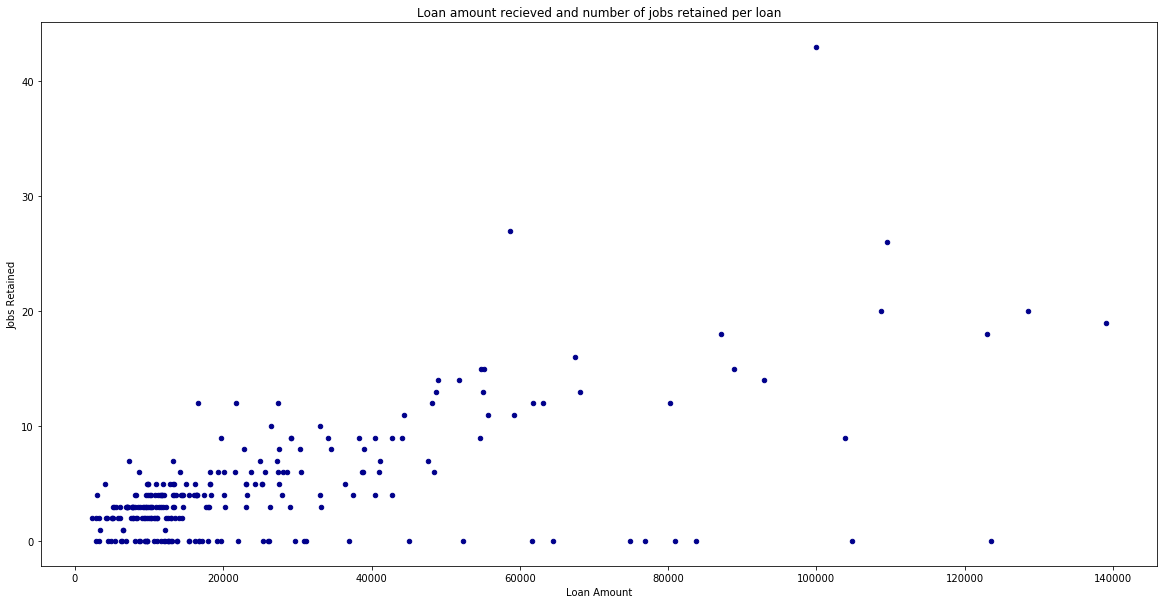

In [143]:
SBA_Low_Income.plot.scatter(figsize=(20, 10), x='Loan Amount', y='Jobs Retained', c='DarkBlue', title='Loan amount recieved and number of jobs retained per loan')

In [149]:
SBA_Middle_Income = SBA_PPP_Zip_Middle_Income.drop(columns= ['Zip','NAICS Code'])

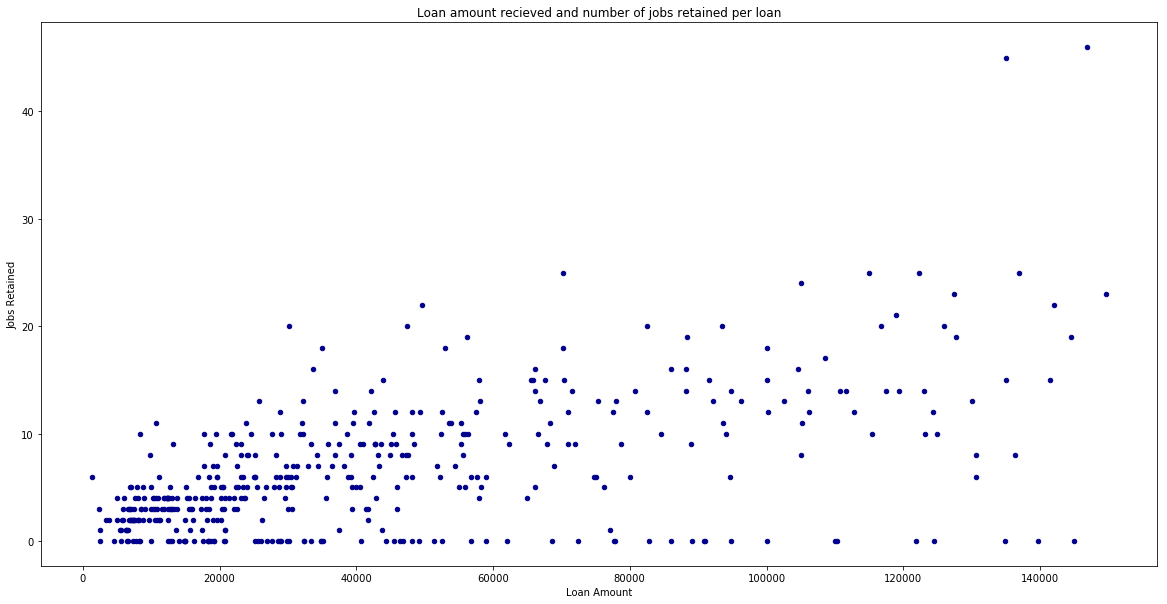

In [151]:
SBA_Middle_Income.plot.scatter(figsize=(20, 10), x='Loan Amount', y='Jobs Retained', c='DarkBlue', title='Loan amount recieved and number of jobs retained per loan')

In [152]:
SBA_High_Income = SBA_PPP_Zip_High_Income.drop(columns= ['Zip','NAICS Code'])

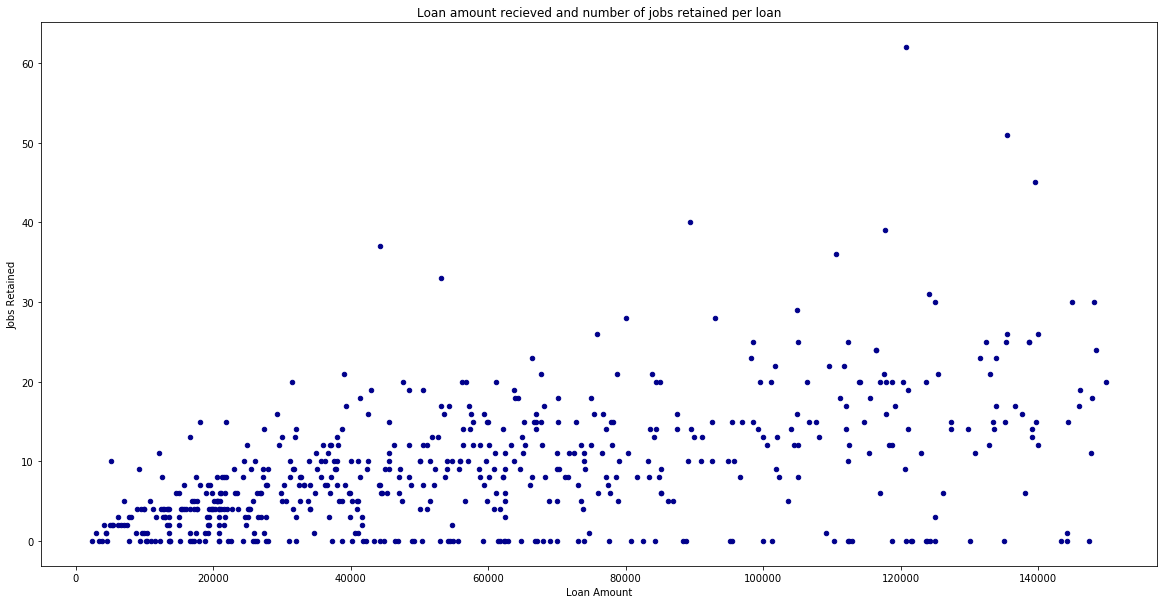

In [153]:
SBA_High_Income.plot.scatter(figsize=(20, 10), x='Loan Amount', y='Jobs Retained', c='DarkBlue', title='Loan amount recieved and number of jobs retained per loan')

In [216]:
# Which are got the most in funding : 

sum_low_income = SBA_PPP_Zip_Low_Income['Loan Amount'].sum()
sum_middle_income = SBA_PPP_Zip_Middle_Income['Loan Amount'].sum()
sum_high_income = SBA_PPP_Zip_High_Income['Loan Amount'].sum()

plotting_loans = ['sum_low_income', 'sum_middle_income', 'sum_high_income']

In [217]:
data = [['Low_income', 6508562], ['Middle_income', 19286695], ['High_income', 34865671]]


In [221]:
df = pd.DataFrame(data, columns = ['Income Zone', 'Loan Amount'])
df['Loan Amount'] = df['Loan Amount'].astype(float)
# Create the pandas DataFrame 

df

,Income Zone,Loan Amount
0,Low_income,6508562.0
1,Middle_income,19286695.0
2,High_income,34865671.0


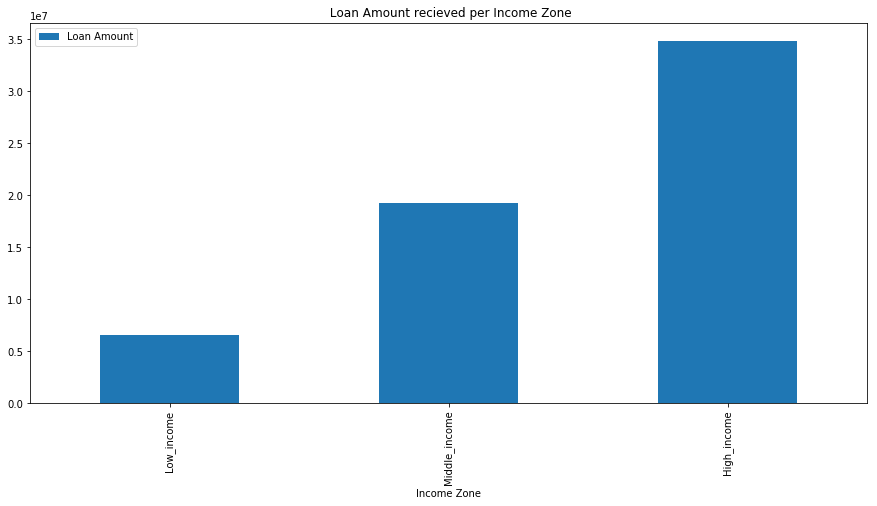

In [222]:
df.plot.bar(figsize=(15, 7), x = "Income Zone", y ="Loan Amount", title = " Loan Amount recieved per Income Zone")

In [225]:
csvpath1= Path('Pre_restaurants.csv')

In [226]:
pre_rest_db= pd.read_csv(csvpath1)

FileNotFoundError: [Errno 2] File b'Pre_restaurants.csv' does not exist: b'Pre_restaurants.csv'